<a href="https://colab.research.google.com/github/icarocarmona/tech_challenge_f1/blob/main/notebooks%20/Analise_sobre_a_exporta%C3%A7%C3%A3o_de_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/trusted/dados_de_vinhos.csv", sep=";" )
dados.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Outros(1),5132,3208,1970,Brasil,Espumantes,Exportação
1,Paraguai,415,152,1970,Brasil,Espumantes,Exportação
2,Bolívia,36,24,1970,Brasil,Espumantes,Exportação
3,Vietnã,0,0,1970,Brasil,Espumantes,Exportação
4,Líbano,0,0,1970,Brasil,Espumantes,Exportação


In [ ]:
dados.value_counts('Tipo Vinho')


Tipo Vinho
Vinho De Mesa    6784
Uvas             6731
Sucos            6413
Espumantes       5353
dtype: int64

In [ ]:
vinhos_de_mesa = dados[dados['Tipo Vinho'] == 'Vinho De Mesa'].reset_index(drop=True)
vinhos_de_mesa.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Paraguai,89846,23980,1970,Brasil,Vinho De Mesa,Exportação
1,Colômbia,14205,6650,1970,Brasil,Vinho De Mesa,Exportação
2,Estados Unidos,11200,4200,1970,Brasil,Vinho De Mesa,Exportação
3,Tanzânia,13692,3562,1970,Brasil,Vinho De Mesa,Exportação
4,Libéria,4160,1190,1970,Brasil,Vinho De Mesa,Exportação


In [ ]:
vinhos_de_mesa.shape

(6784, 7)

In [ ]:
vinhos_de_mesa[['Destino', 'Quantidade (L)', 'Ano']]

,Destino,Quantidade (L),Ano
0,Paraguai,89846,1970
1,Colômbia,14205,1970
2,Estados Unidos,11200,1970
3,Tanzânia,13692,1970
4,Libéria,4160,1970
...,...,...,...
6779,Nicaragua,0,2022
6780,Nova Caledônia,0,2022
6781,Costa Rica,0,2022
6782,Honduras,0,2022


In [ ]:
top_10_paises = vinhos_de_mesa.groupby(by='Destino')['Quantidade (L)'].sum().sort_values(ascending=False).head(10).index
top_10_paises

Index(['Paraguai', 'Estados Unidos', 'Rússia', 'Japão', 'Angola',
       'Reino Unido', 'China', 'Espanha', 'Haiti', 'Países Baixos'],
      dtype='object', name='Destino')

In [ ]:
vinhos_de_mesa_filtrado = vinhos_de_mesa[vinhos_de_mesa['Destino'].isin(top_10_paises)]
vinhos_de_mesa_filtrado.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Paraguai,89846,23980,1970,Brasil,Vinho De Mesa,Exportação
2,Estados Unidos,11200,4200,1970,Brasil,Vinho De Mesa,Exportação
22,Países Baixos,0,0,1970,Brasil,Vinho De Mesa,Exportação
27,Japão,0,0,1970,Brasil,Vinho De Mesa,Exportação
58,Rússia,0,0,1970,Brasil,Vinho De Mesa,Exportação


In [ ]:
import seaborn as sns

<Axes: xlabel='Ano', ylabel='Quantidade (L)'>

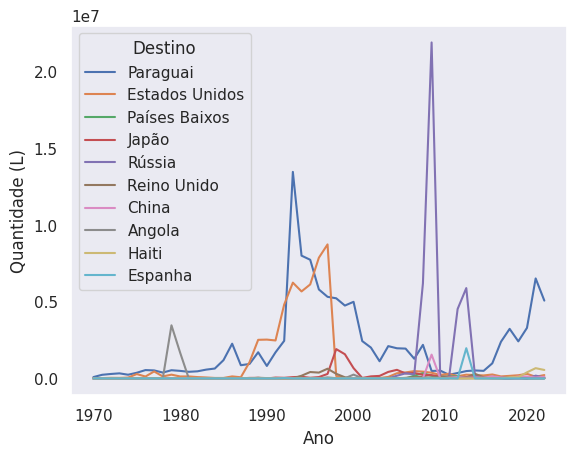

In [ ]:
sns.set_theme(style='dark')

sns.lineplot(data=vinhos_de_mesa_filtrado,
            x='Ano', y= 'Quantidade (L)', hue='Destino')

In [ ]:
# filtrar apenas os dados de 2010 pra frente
vinhos_de_mesa_filtrado = vinhos_de_mesa_filtrado[vinhos_de_mesa_filtrado['Ano'] >= 2010]

<Axes: xlabel='Ano', ylabel='Quantidade (L)'>

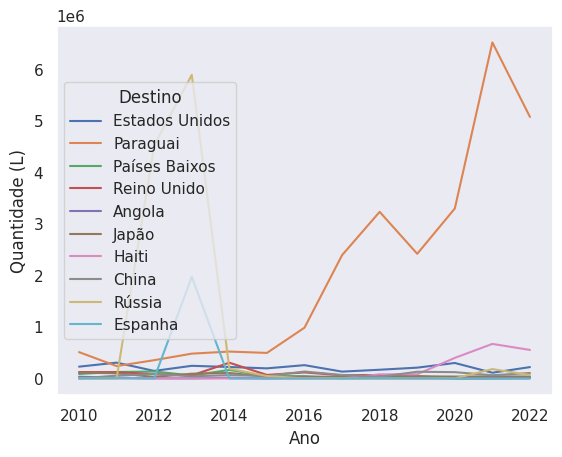

In [ ]:

sns.lineplot(data=vinhos_de_mesa_filtrado,
            x='Ano', y= 'Quantidade (L)', hue='Destino')

https://ainfo.cnptia.embrapa.br/digital/bitstream/item/130799/1/Comunicado-Tecnico-174.pdf

Pelo que entendi no relatório a queda de 2014 deve pelo seguinte motivo:

A quantidade de vinhos exportada em 2014 foi
de 2,32 milhões de litros, representando uma
redução de 74,60%. Essa redução aconteceu
porque em 2013 o setor se beneficiou do Programa
de Escoamento da Produção (PEPRO), pois havia
vantagem competitiva no mercado internacional
para adotá-lo, o que não ocorreu em 2014. As
cooperativas participaram desse programa com
a adesão de pequenos produtores de agricultura
familiar. O escoamento foi feito com vinho a granel

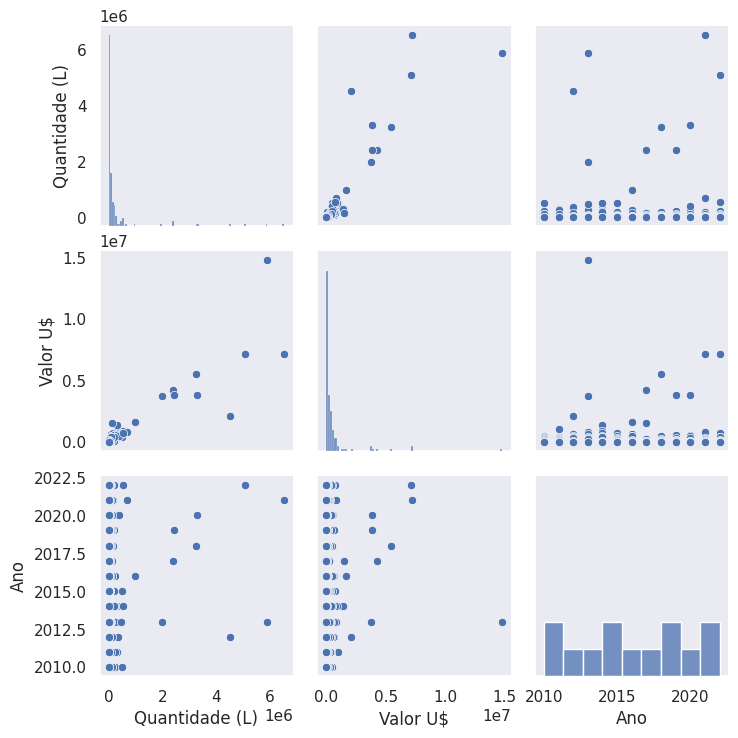

In [ ]:
sns.pairplot(vinhos_de_mesa_filtrado)

<Axes: xlabel='Ano', ylabel='Valor U$'>

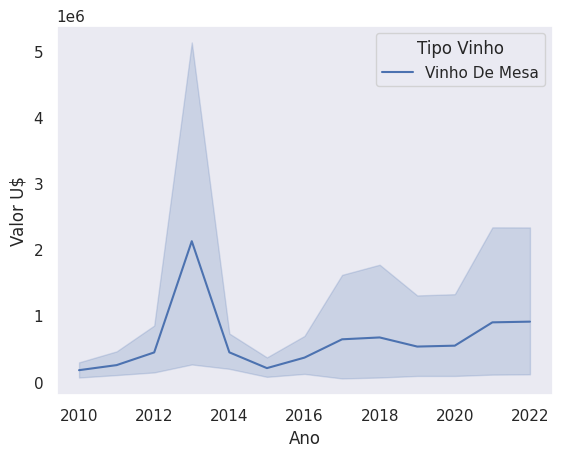

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(5,10))
sns.lineplot(data=vinhos_de_mesa_filtrado, x='Ano', y='Valor U$', hue='Tipo Vinho')

<Axes: xlabel='Ano', ylabel='Valor U$'>

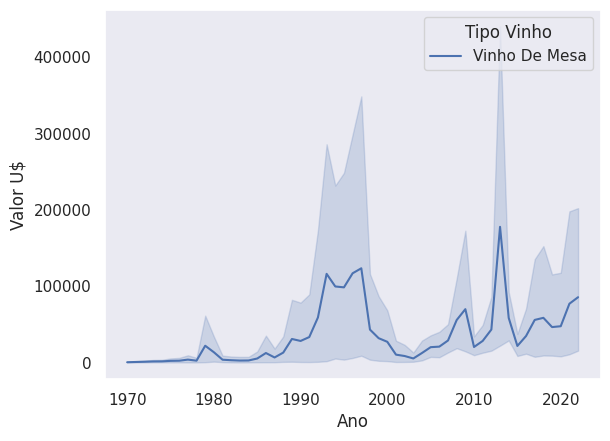

In [ ]:
sns.lineplot(data=vinhos_de_mesa, x='Ano', y='Valor U$', hue='Tipo Vinho')


In [ ]:
df = vinhos_de_mesa[vinhos_de_mesa['Ano'] >= 2022]
# df.sort_values('Valor U$',ascending=False)


# rows_with_zeros = df[]
rows_with_zeros = (df == 0).any(axis=1)

df = df[~rows_with_zeros]
df

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
6656,Paraguai,5076670,7156293,2022,Brasil,Vinho De Mesa,Exportação
6657,Uruguai,637117,997367,2022,Brasil,Vinho De Mesa,Exportação
6658,Haiti,553503,741014,2022,Brasil,Vinho De Mesa,Exportação
6659,Estados Unidos,220373,447893,2022,Brasil,Vinho De Mesa,Exportação
6660,China,105395,404647,2022,Brasil,Vinho De Mesa,Exportação
...,...,...,...,...,...,...,...
6727,Bulgária,5,31,2022,Brasil,Vinho De Mesa,Exportação
6728,Suécia,5,18,2022,Brasil,Vinho De Mesa,Exportação
6729,Guiana Francesa,22,18,2022,Brasil,Vinho De Mesa,Exportação
6730,Dinamarca,2,6,2022,Brasil,Vinho De Mesa,Exportação


In [ ]:
df.mean()

<ipython-input-17-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Quantidade (L)     92447.144737
Valor U$          144016.868421
Ano                 2022.000000
dtype: float64

In [ ]:
df['vl_litro'] = df['Valor U$'] / df['Quantidade (L)']
df.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,vl_litro
6656,Paraguai,5076670,7156293,2022,Brasil,Vinho De Mesa,Exportação,1.409643
6657,Uruguai,637117,997367,2022,Brasil,Vinho De Mesa,Exportação,1.565438
6658,Haiti,553503,741014,2022,Brasil,Vinho De Mesa,Exportação,1.338771
6659,Estados Unidos,220373,447893,2022,Brasil,Vinho De Mesa,Exportação,2.032431
6660,China,105395,404647,2022,Brasil,Vinho De Mesa,Exportação,3.839338


In [ ]:
df = df.sort_values('vl_litro', ascending=False)
df.head(10)

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,vl_litro
6719,Áustria,6,212,2022,Brasil,Vinho De Mesa,Exportação,35.333333
6710,Luxemburgo,36,802,2022,Brasil,Vinho De Mesa,Exportação,22.277778
6663,Emirados Arabes Unidos,4781,85465,2022,Brasil,Vinho De Mesa,Exportação,17.875967
6671,Noruega,2711,40316,2022,Brasil,Vinho De Mesa,Exportação,14.871265
6715,Croácia,34,484,2022,Brasil,Vinho De Mesa,Exportação,14.235294
6679,Suíça,1584,20863,2022,Brasil,Vinho De Mesa,Exportação,13.171086
6723,Bangladesh,7,84,2022,Brasil,Vinho De Mesa,Exportação,12.000000
6716,Taiwan (FORMOSA),25,277,2022,Brasil,Vinho De Mesa,Exportação,11.080000
6684,Austrália,1424,12299,2022,Brasil,Vinho De Mesa,Exportação,8.636938
6685,"Tcheca, República",1305,9997,2022,Brasil,Vinho De Mesa,Exportação,7.660536


In [ ]:
df[df['Valor U$'] >= 100000]

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,vl_litro
6661,Reino Unido,18835,138154,2022,Brasil,Vinho De Mesa,Exportação,7.334962
6660,China,105395,404647,2022,Brasil,Vinho De Mesa,Exportação,3.839338
6659,Estados Unidos,220373,447893,2022,Brasil,Vinho De Mesa,Exportação,2.032431
6662,Rússia,66046,118618,2022,Brasil,Vinho De Mesa,Exportação,1.795991
6657,Uruguai,637117,997367,2022,Brasil,Vinho De Mesa,Exportação,1.565438
6656,Paraguai,5076670,7156293,2022,Brasil,Vinho De Mesa,Exportação,1.409643
6658,Haiti,553503,741014,2022,Brasil,Vinho De Mesa,Exportação,1.338771


In [ ]:
df.sort_values('Valor U$', ascending=False).head(10)

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,vl_litro
6656,Paraguai,5076670,7156293,2022,Brasil,Vinho De Mesa,Exportação,1.409643
6657,Uruguai,637117,997367,2022,Brasil,Vinho De Mesa,Exportação,1.565438
6658,Haiti,553503,741014,2022,Brasil,Vinho De Mesa,Exportação,1.338771
6659,Estados Unidos,220373,447893,2022,Brasil,Vinho De Mesa,Exportação,2.032431
6660,China,105395,404647,2022,Brasil,Vinho De Mesa,Exportação,3.839338
6661,Reino Unido,18835,138154,2022,Brasil,Vinho De Mesa,Exportação,7.334962
6662,Rússia,66046,118618,2022,Brasil,Vinho De Mesa,Exportação,1.795991
6663,Emirados Arabes Unidos,4781,85465,2022,Brasil,Vinho De Mesa,Exportação,17.875967
6664,Japão,37324,82208,2022,Brasil,Vinho De Mesa,Exportação,2.202551
6665,Curaçao,40673,66950,2022,Brasil,Vinho De Mesa,Exportação,1.646055


In [ ]:

# rows_with_zeros = df[]
rows_with_zeros = (vinhos_de_mesa == 0).any(axis=1)

df2 = vinhos_de_mesa[~rows_with_zeros]
df2 = df2[df2['Destino'] == 'Paraguai']
# df2 = df2[df2['Ano'] >= 2014]
df2.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Paraguai,89846,23980,1970,Brasil,Vinho De Mesa,Exportação
128,Paraguai,237805,64075,1971,Brasil,Vinho De Mesa,Exportação
256,Paraguai,291625,84402,1972,Brasil,Vinho De Mesa,Exportação
384,Paraguai,332433,115041,1973,Brasil,Vinho De Mesa,Exportação
512,Paraguai,243294,119429,1974,Brasil,Vinho De Mesa,Exportação


Text(0.5, 1.0, 'Exportação para o Paraguai')

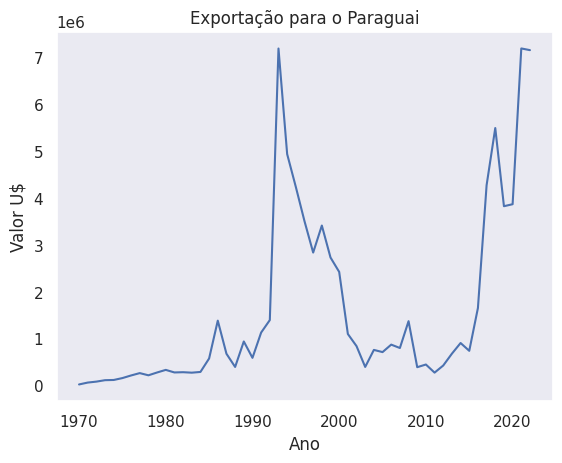

In [ ]:
sns.lineplot(data=df2, x='Ano', y='Valor U$')
plt.title('Exportação para o Paraguai')

Text(0.5, 1.0, 'Exportação para o Paraguai')

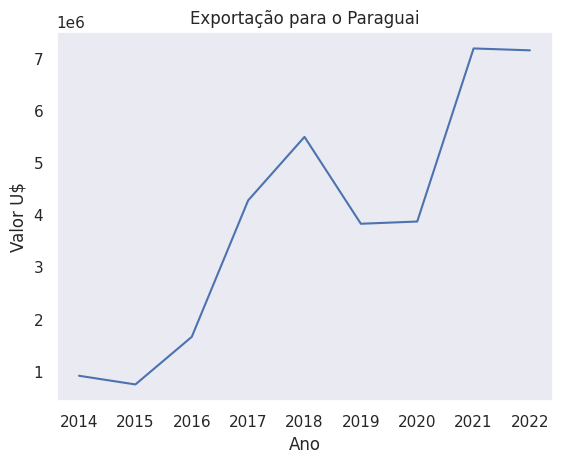

In [ ]:
# rows_with_zeros = df[]
rows_with_zeros = (vinhos_de_mesa == 0).any(axis=1)

df2 = vinhos_de_mesa[~rows_with_zeros]
df2 = df2[df2['Destino'] == 'Paraguai']
df2 = df2[df2['Ano'] >= 2014]
df2.head()
sns.lineplot(data=df2, x='Ano', y='Valor U$')
plt.title('Exportação para o Paraguai')

In [ ]:
print(f"MEAN - U$ {vinhos_de_mesa['Valor U$'].mean():.2f}")

MEAN - U$ 35715.80


In [ ]:
df2 = vinhos_de_mesa[~rows_with_zeros]
df2 = df2[df2['Destino'] == 'Paraguai']
# df2 = df2[df2['Ano'] >= 2020]
df2['Variação Percentual'] = df2['Valor U$'].pct_change() * 100

df2['Variação Percentual'] = df2['Variação Percentual'].fillna(0)
# Formate os valores com duas casas decimais
df2['Variação Percentual'] = df2['Variação Percentual'].round(2)

df2.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,Variação Percentual
0,Paraguai,89846,23980,1970,Brasil,Vinho De Mesa,Exportação,0.00
128,Paraguai,237805,64075,1971,Brasil,Vinho De Mesa,Exportação,167.20
256,Paraguai,291625,84402,1972,Brasil,Vinho De Mesa,Exportação,31.72
384,Paraguai,332433,115041,1973,Brasil,Vinho De Mesa,Exportação,36.30
512,Paraguai,243294,119429,1974,Brasil,Vinho De Mesa,Exportação,3.81


In [ ]:
!pip install plotly==5.17.0

install: missing destination file operand after 'plotly==5.17.0'
Try 'install --help' for more information.


In [ ]:
import plotly.express as px


In [ ]:
# Exemplo de como usar o plotly
# fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
# fig.write_html('first_figure.html', auto_open=True)
# fig.show()


In [ ]:
cascata = df2.iloc[-10:]
cascata

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,Variação Percentual
5507,Paraguai,481564,680828,2013,Brasil,Vinho De Mesa,Exportação,58.97
5633,Paraguai,521847,908028,2014,Brasil,Vinho De Mesa,Exportação,33.37
5760,Paraguai,495428,741370,2015,Brasil,Vinho De Mesa,Exportação,-18.35
5888,Paraguai,985739,1655417,2016,Brasil,Vinho De Mesa,Exportação,123.29
6016,Paraguai,2393468,4274650,2017,Brasil,Vinho De Mesa,Exportação,158.22
6144,Paraguai,3234168,5494321,2018,Brasil,Vinho De Mesa,Exportação,28.53
6272,Paraguai,2419537,3826587,2019,Brasil,Vinho De Mesa,Exportação,-30.35
6400,Paraguai,3299013,3869243,2020,Brasil,Vinho De Mesa,Exportação,1.11
6528,Paraguai,6522527,7192362,2021,Brasil,Vinho De Mesa,Exportação,85.89
6656,Paraguai,5076670,7156293,2022,Brasil,Vinho De Mesa,Exportação,-0.50


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    x=cascata['Ano'],
    y=cascata['Variação Percentual'],
    text=cascata['Variação Percentual'],
    textposition = "outside",
    ))

fig.update_layout(
        title = "Exportação para o Paraguai nos ulitmos 10 anos",
        showlegend = True
)
fig.show()

## quanto o brasil exportou de vinho nos ultimos anos?
## qual a diferençao entre 1970 e 2022?
## qual a diferença entre 2010 e 2022?

In [ ]:
agg_ano = dados.groupby(by='Ano')['Valor U$', 'Quantidade (L)'].sum()
agg_ano.head()

<ipython-input-59-1c7368dee2e6>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Valor U$,Quantidade (L)
Ano,,
1970,43884,141592
1971,87066,291096
1972,191784,504842
1973,609080,1120589
1974,600368,835988


<Axes: xlabel='Ano'>

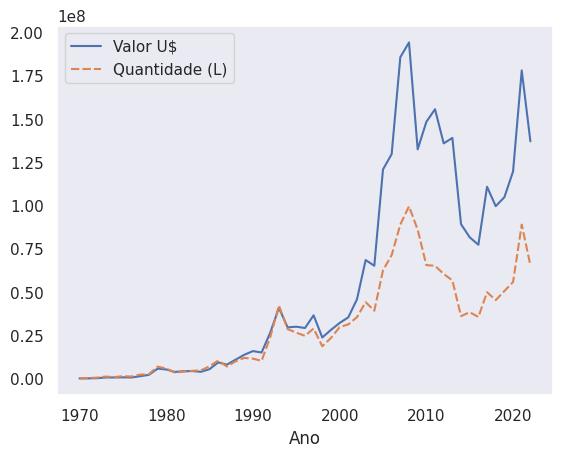

In [ ]:
sns.lineplot(agg_ano)

In [ ]:
agg_ano['Vl Litro'] = agg_ano['Valor U$']/agg_ano['Quantidade (L)']

In [ ]:
df = agg_ano.reset_index()
ano_inicial = df.loc[df['Ano'].idxmin()]['Ano']
ano_final = df.loc[df['Ano'].idxmax()]['Ano']

valor_inicial = df.loc[df['Ano'].idxmin()]['Valor U$']

# Encontre o valor de venda do último ano
valor_final = df.loc[df['Ano'].idxmax()]['Valor U$']

# Calcule a porcentagem de mudança
porcentagem_mudanca = ((valor_final - valor_inicial) / valor_inicial) * 100

print(f'A porcentagem de mudança entre o {ano_inicial:.0f} e o {ano_final:.0f} ano é: {porcentagem_mudanca:.2f}%')


A porcentagem de mudança entre o 1970 e o 2022 ano é: 312380.67%


2013

In [ ]:
# df = agg_ano.reset_index()
ano = 2022
ano_inicial = agg_ano.index[-10:][0]
ano_final = agg_ano.index[-10:][-1]

valor_inicial = agg_ano.loc[ano_inicial]['Valor U$']

# Encontre o valor de venda do último ano
valor_final = agg_ano.loc[ano_final]['Valor U$']

# Calcule a porcentagem de mudança
porcentagem_mudanca = ((valor_final - valor_inicial) / valor_inicial) * 100

print(f'A porcentagem de mudança entre o {ano_inicial:.0f} e o {ano_final:.0f} ano é: {porcentagem_mudanca:.2f}%')

A porcentagem de mudança entre o 2013 e o 2022 ano é: -1.41%


<Axes: xlabel='Ano', ylabel='Valor U$'>

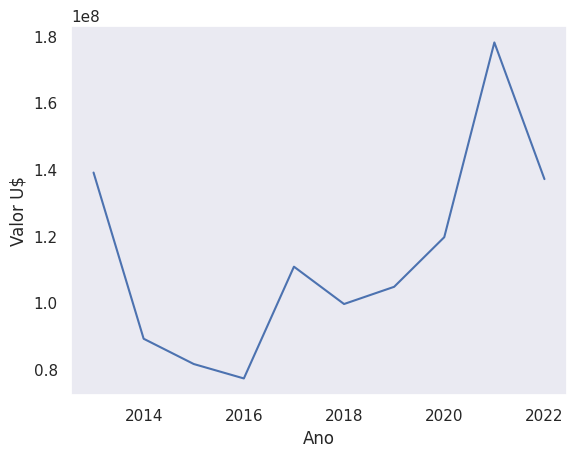

In [ ]:
ultimos_10_anos = agg_ano.tail(10)

sns.lineplot(y=ultimos_10_anos['Valor U$'], x=ultimos_10_anos.index)


<Axes: xlabel='Ano'>

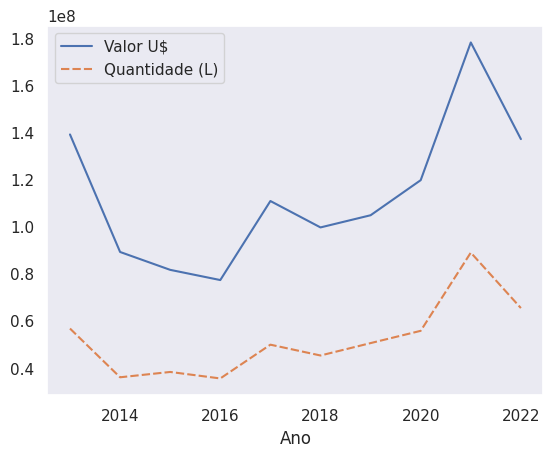

In [ ]:
sns.lineplot(ultimos_10_anos[['Valor U$','Quantidade (L)']])

<Axes: xlabel='Ano', ylabel='Vl Litro'>

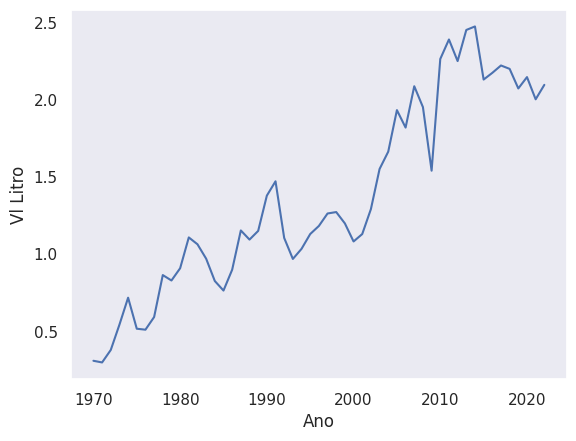

In [ ]:
sns.lineplot(y=agg_ano['Vl Litro'], x=agg_ano.index)